In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv("/gdrive/My Drive/Project_1/project_healthcare/diabetes.csv") # Read train data

In [ ]:
df = diabetes.copy()

In [ ]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

Text(0.5, 1.0, 'Count of Outcome Values')

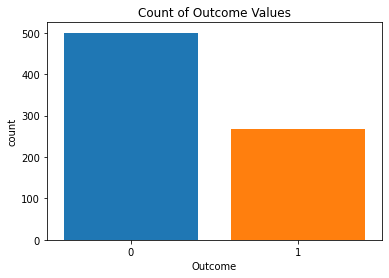

In [ ]:
# countplot
plt.figure()
sns.countplot(x = df["Outcome"], data = df, saturation = 1)
plt.title("Count of Outcome Values")

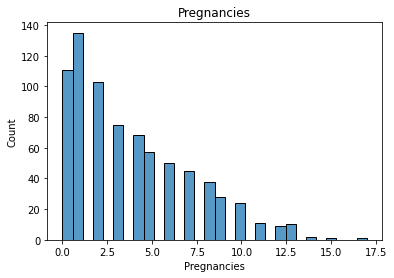

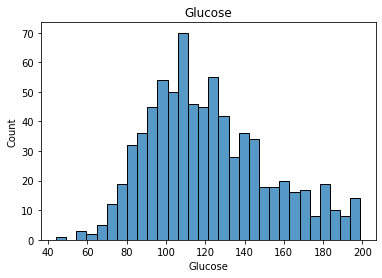

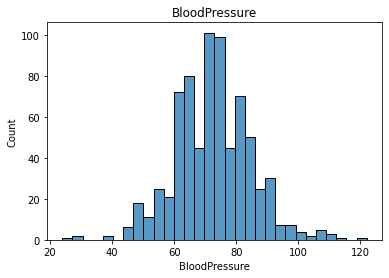

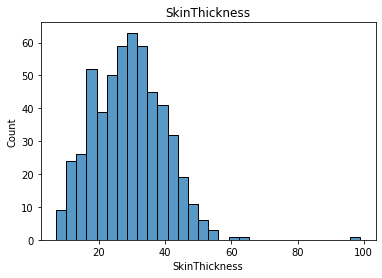

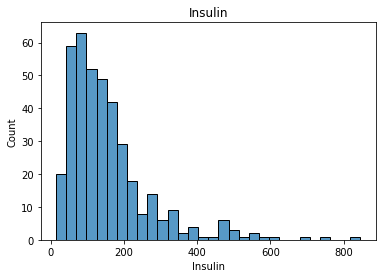

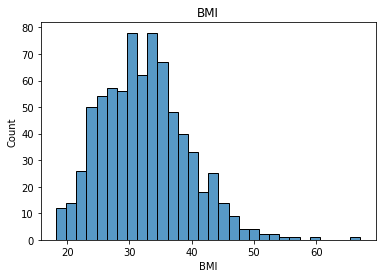

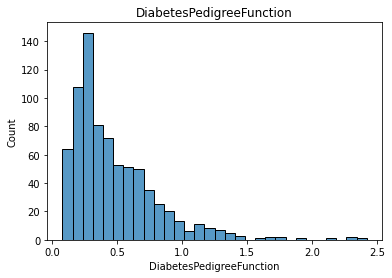

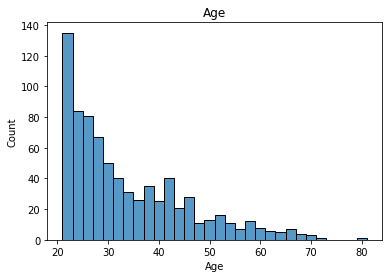

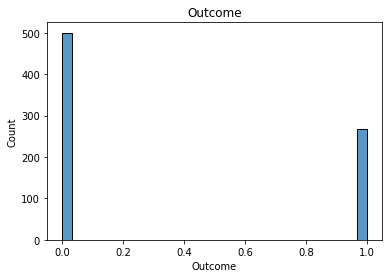

In [ ]:
# Histogram
for i in list(df.columns):
    plt.figure()
    sns.histplot(x = i, data = df, bins = 30)
    plt.title(i)

<Figure size 432x288 with 0 Axes>

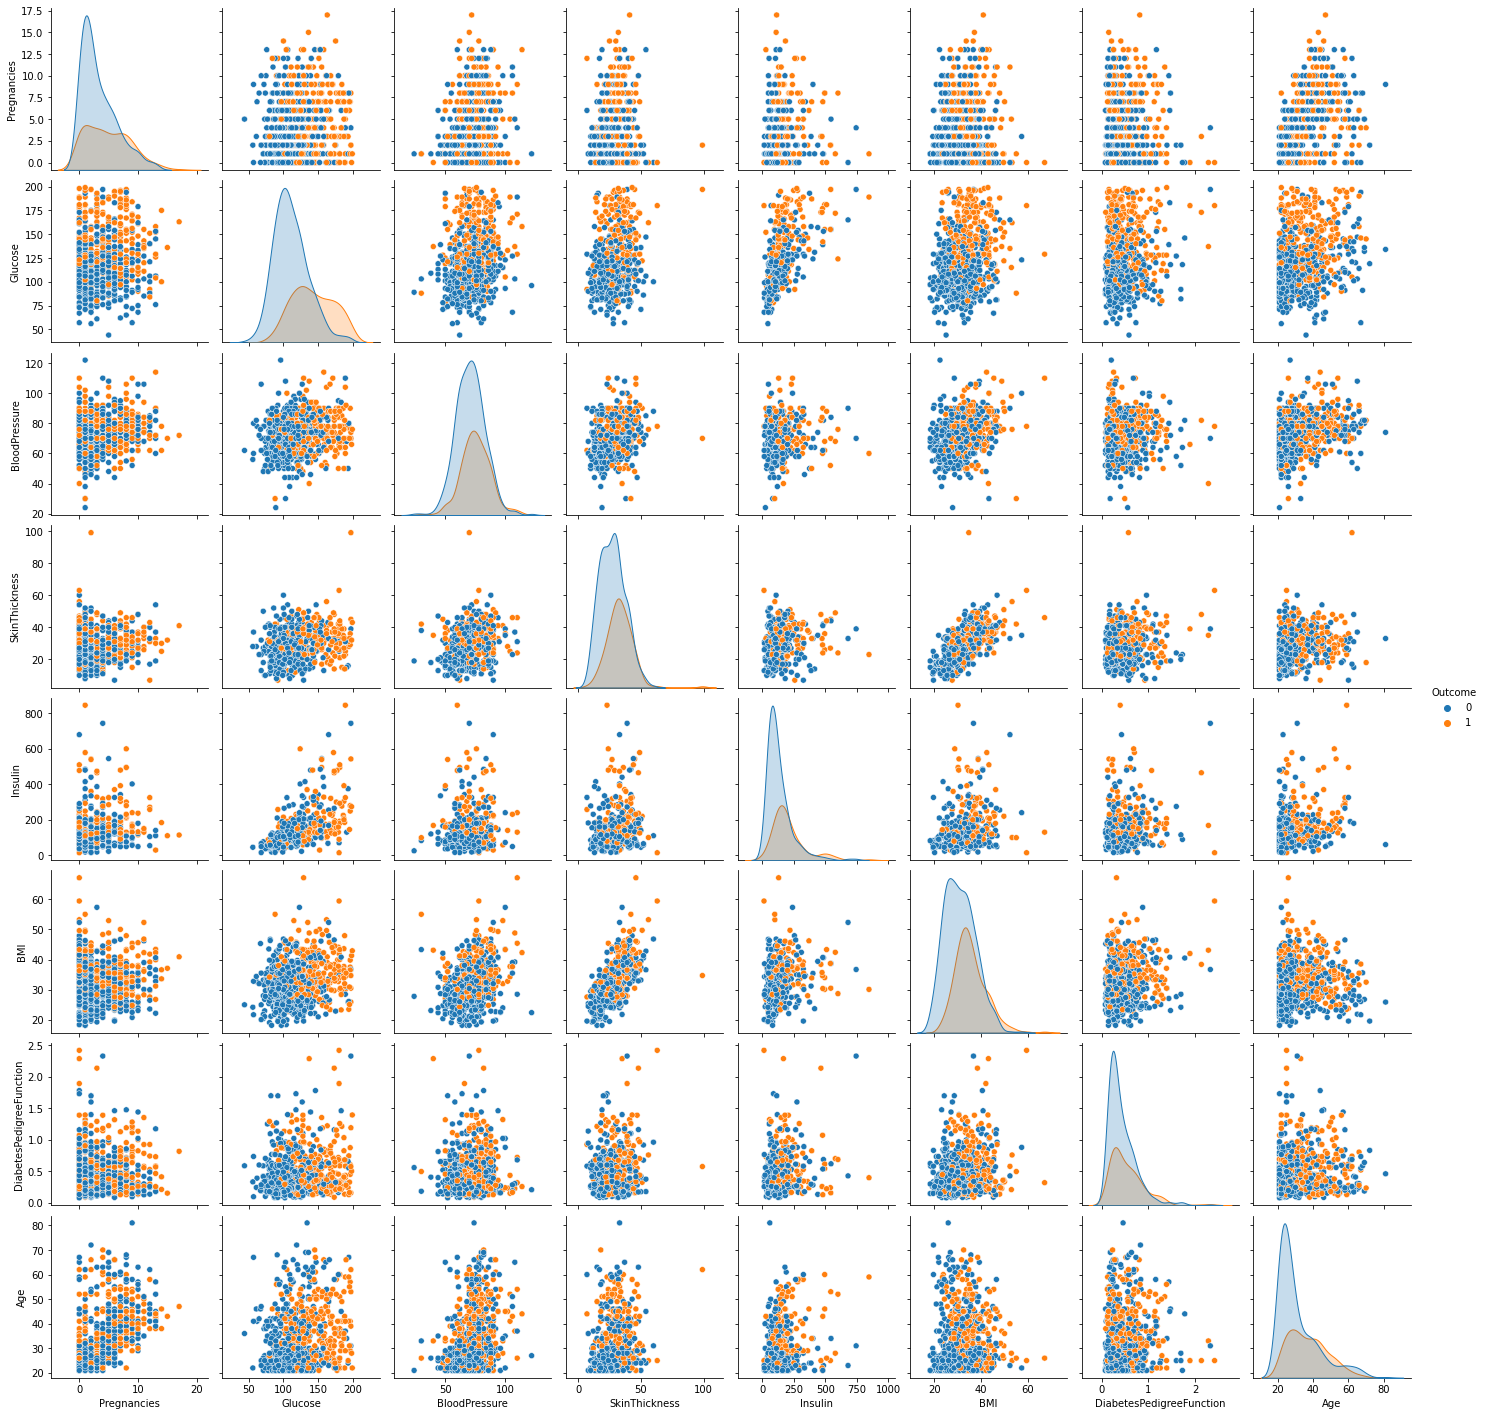

In [ ]:
# Pairplot
plt.figure()
sns.pairplot(df, hue = "Outcome", diag_kind = "kde")
plt.show()

In [ ]:
# unique values
for i in list(df.columns):
    print(f"{i} --> {df[i].value_counts().shape[0]}")

Pregnancies --> 17
Glucose --> 135
BloodPressure --> 46
SkinThickness --> 50
Insulin --> 185
BMI --> 247
DiabetesPedigreeFunction --> 517
Age --> 52
Outcome --> 2


In [ ]:
# Classification Algorithm
from sklearn.linear_model import LogisticRegression

# Standardization
from sklearn.preprocessing import StandardScaler

# Train Test Splitting and Tuning With Grid Search Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV

# Accuracy Score & ROC Curve
from sklearn.metrics import accuracy_score, roc_curve

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
numerical_list = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

In [ ]:
scaled_array = scaler.fit_transform(df[numerical_list])
scaled_array

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [ ]:
df_dummy = pd.DataFrame(scaled_array, columns = numerical_list)
df_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
df_dummy = pd.concat([df_dummy, df.loc[:, "Outcome"]], axis = 1)
df_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


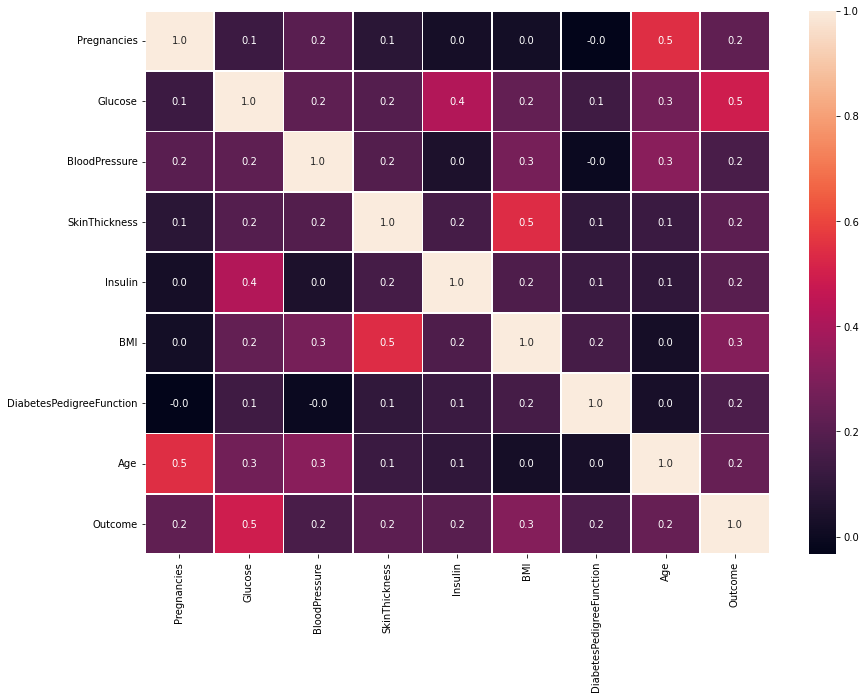

In [ ]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
# splitting features and output
X = df1.drop(["Outcome"], axis = 1)
y = df1[["Outcome"]]

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X[numerical_list] = scaler.fit_transform(X[numerical_list])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)
logreg = LogisticRegression()
logreg

LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)


In [ ]:
y_pred = np.argmax(y_pred_prob, axis = 1)


In [ ]:
# Test Accuracy 
print(f"Test Accuracy Score: {accuracy_score(y_pred, y_test)}")

Test Accuracy Score: 0.7792207792207793


In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

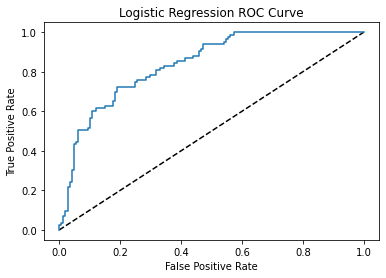

In [ ]:
# plot curve
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()